In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.shape

(3276, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

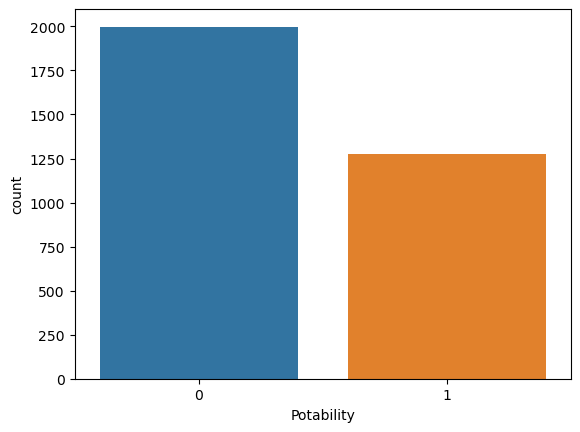

In [10]:
sns.countplot(data=df, x='Potability')

<Axes: ylabel='Potability'>

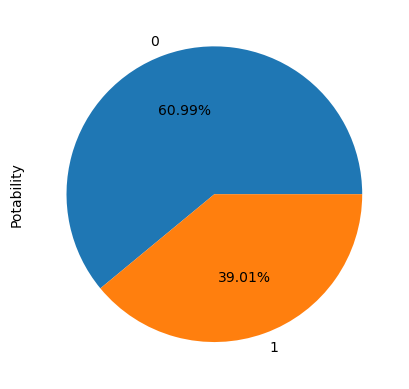

In [11]:
df.Potability.value_counts().plot(kind='pie',autopct="%.2f%%")

<Axes: xlabel='Potability', ylabel='ph'>

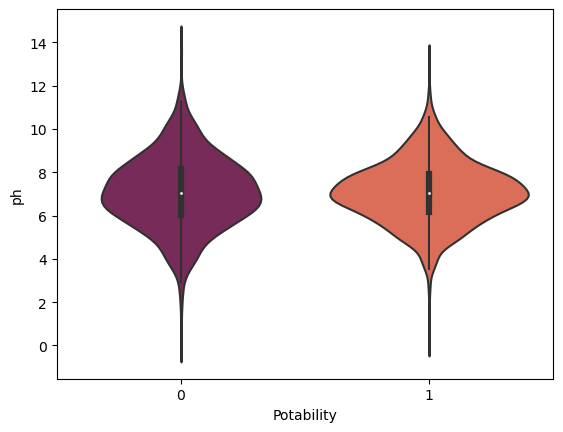

In [12]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

<Axes: xlabel='Potability', ylabel='Density'>

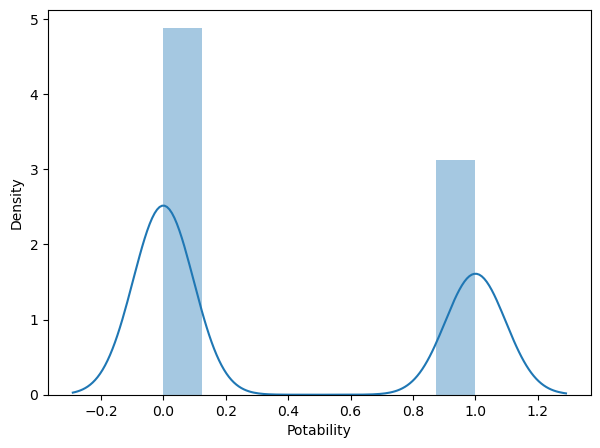

In [13]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Potability'])

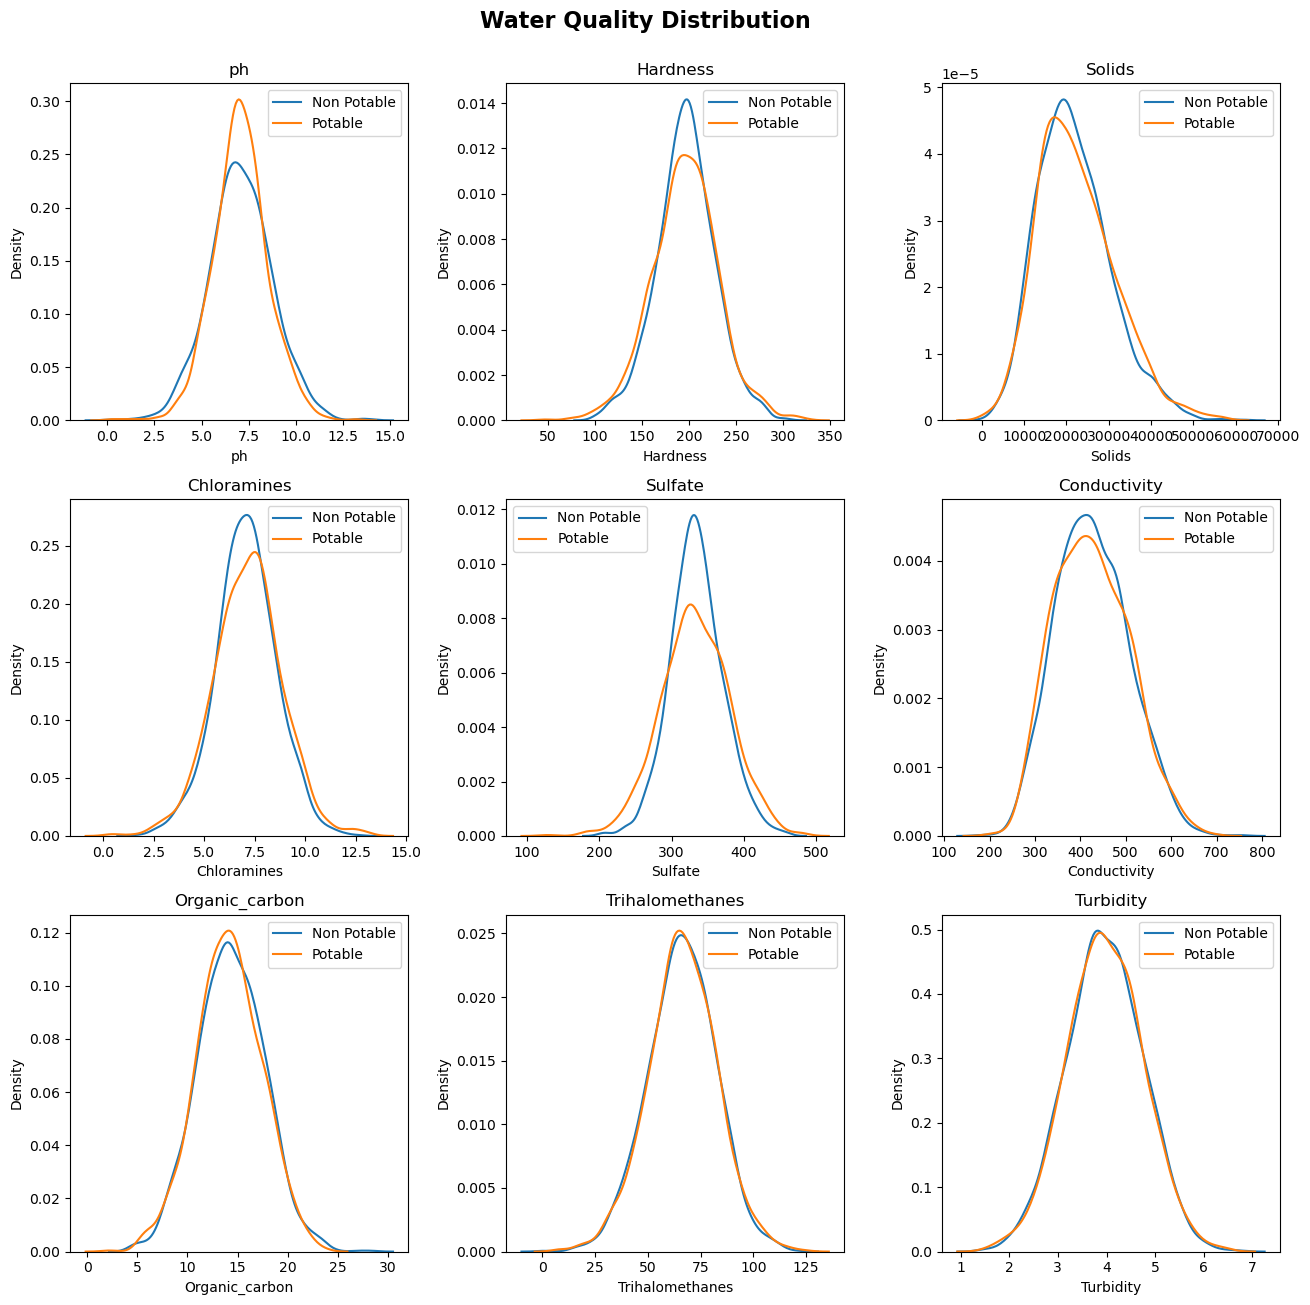

In [18]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] == 1]

plt.figure(figsize=(13,13))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col],label = "Non Potable")
    sns.kdeplot(x=potable[col],label = "Potable")
    plt.legend()

plt.suptitle('Water Quality Distribution',y=1, size = 16, color = 'black', weight='bold')   
plt.tight_layout()

In [19]:
df.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [20]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 0.92, 'Water Quality Heat Map')

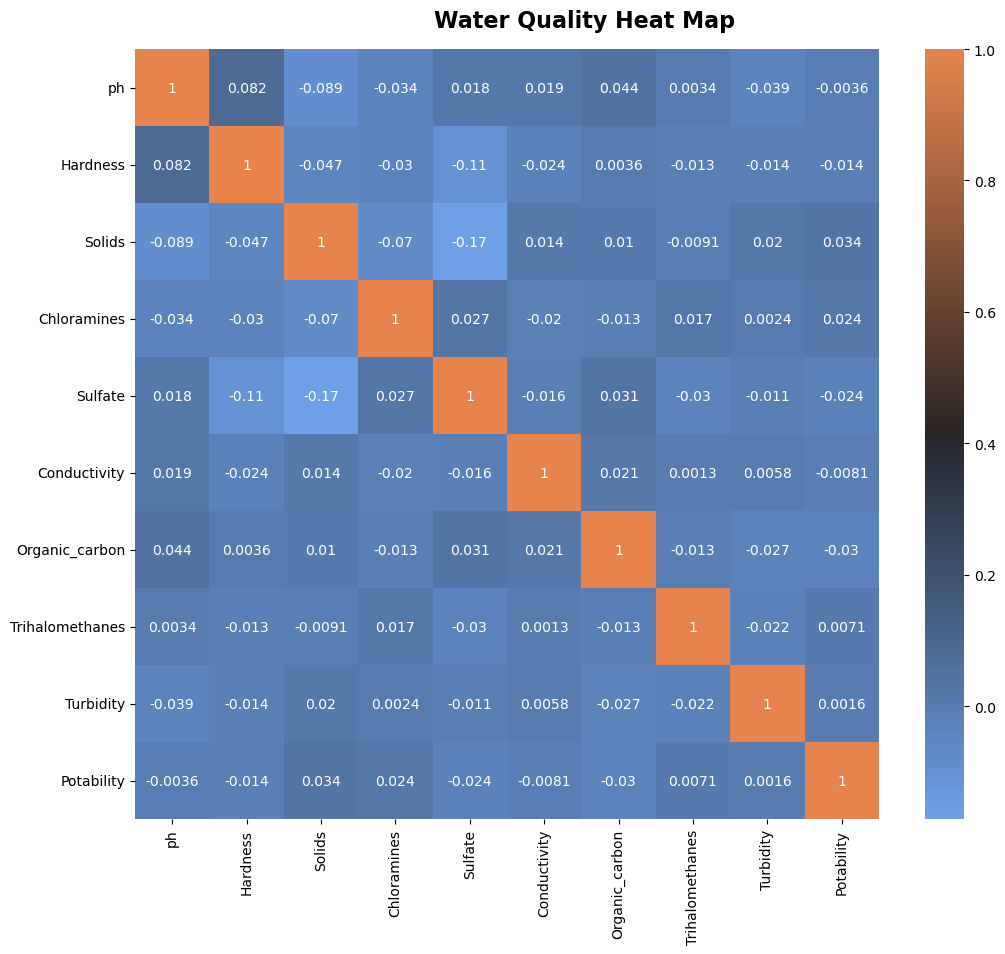

In [21]:
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df.corr(), annot = True, cmap=cmap)
plt.suptitle('Water Quality Heat Map', y = 0.92, size = 16, color = 'black', weight='bold')

Text(0.5, 1.01, 'Water Quality Pair-Plot')

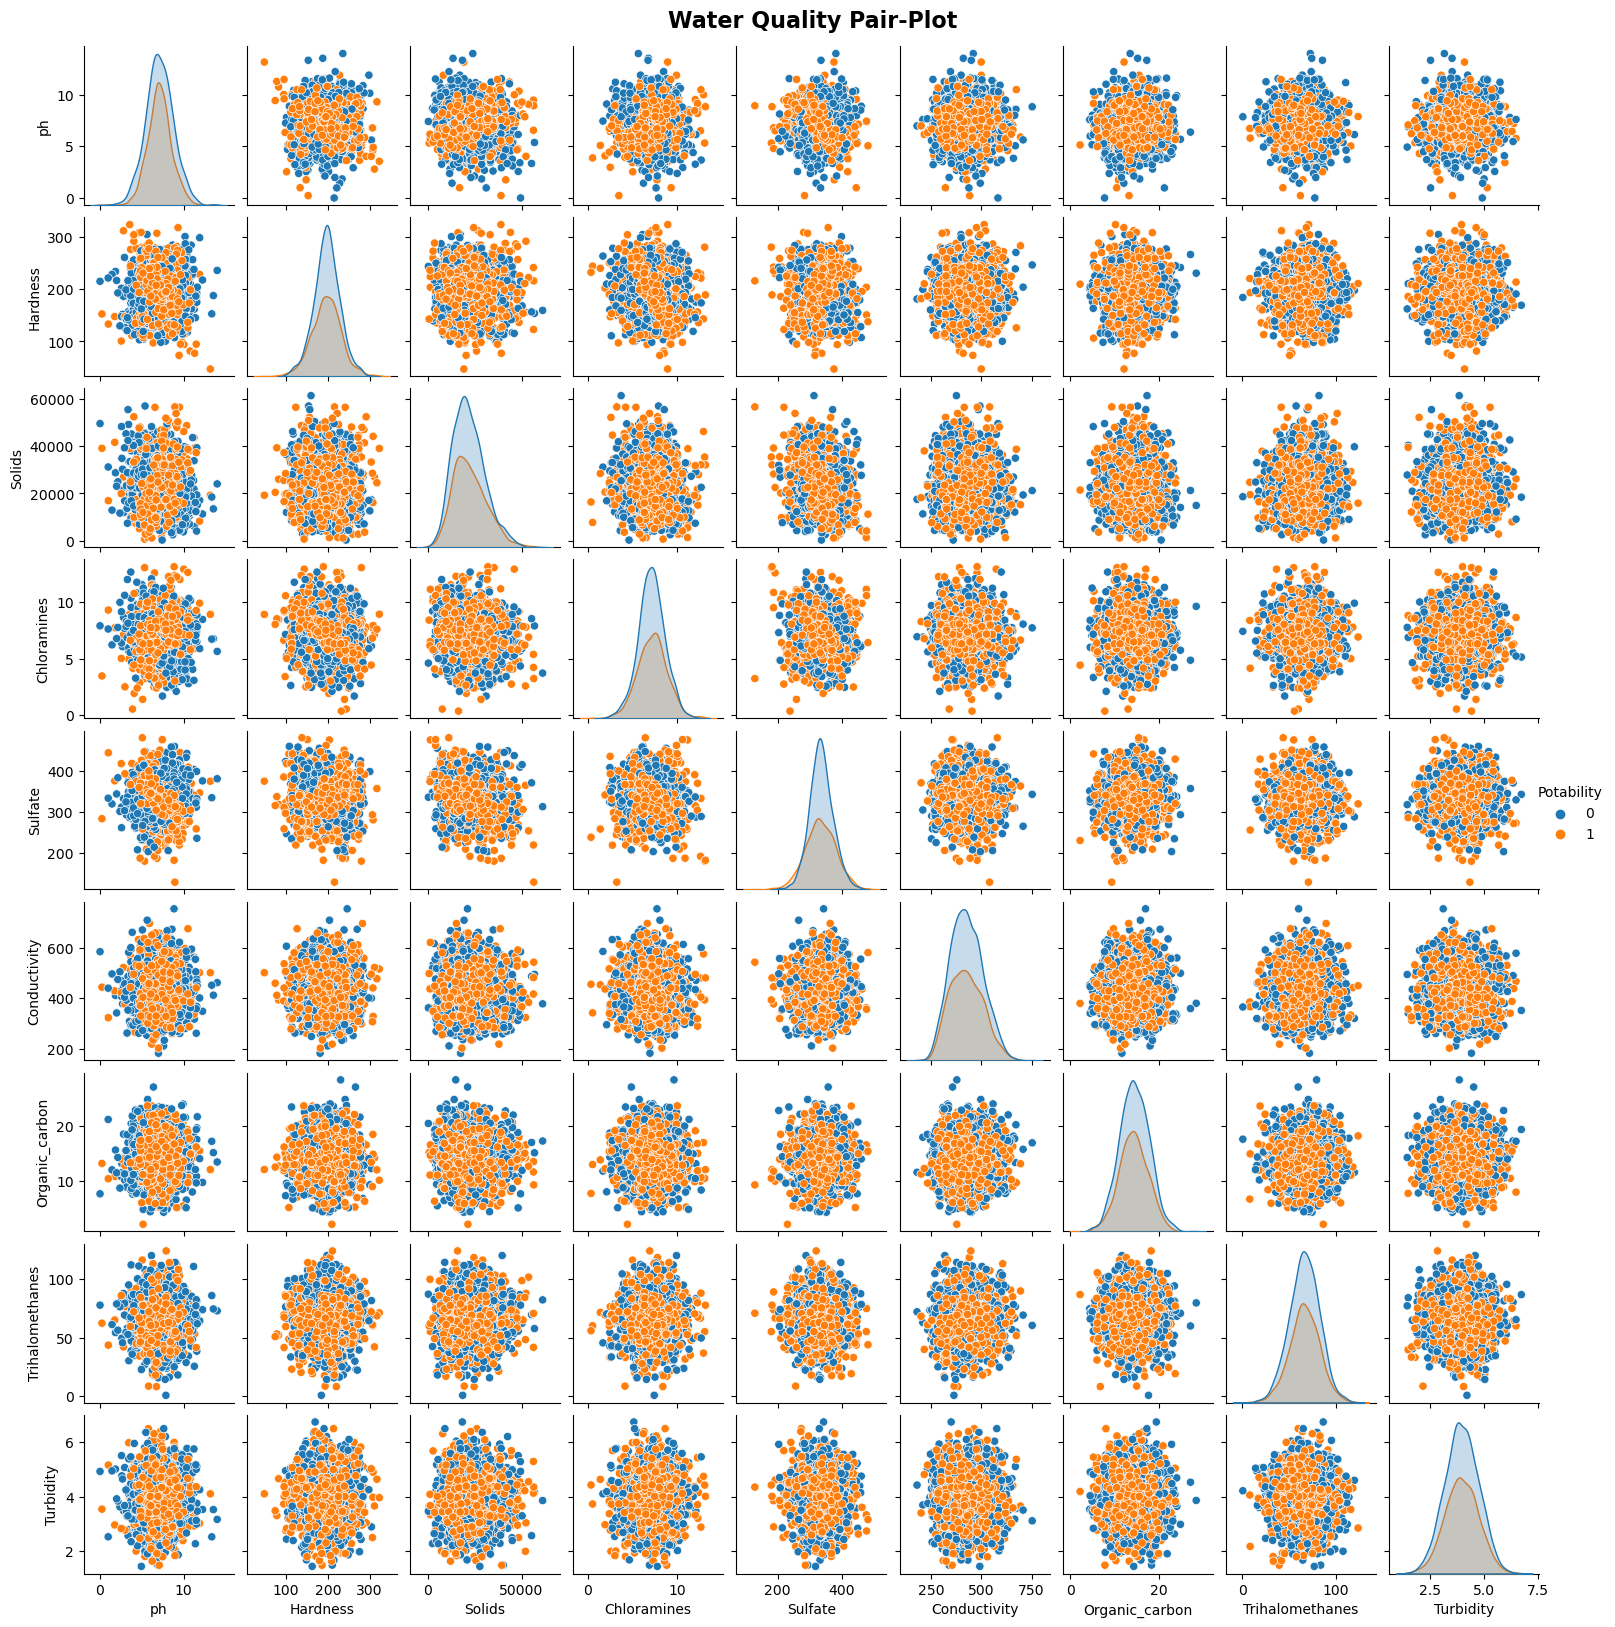

In [22]:
ax = sns.pairplot(df, hue = "Potability", diag_kind = "kde", kind = "scatter")
ax.fig.set_size_inches(16,16)
ax.fig.suptitle('Water Quality Pair-Plot',y=1.01, size = 16, color = 'black', weight='bold')

Text(0.5, 1.01, 'Water Quality Box-Plot')

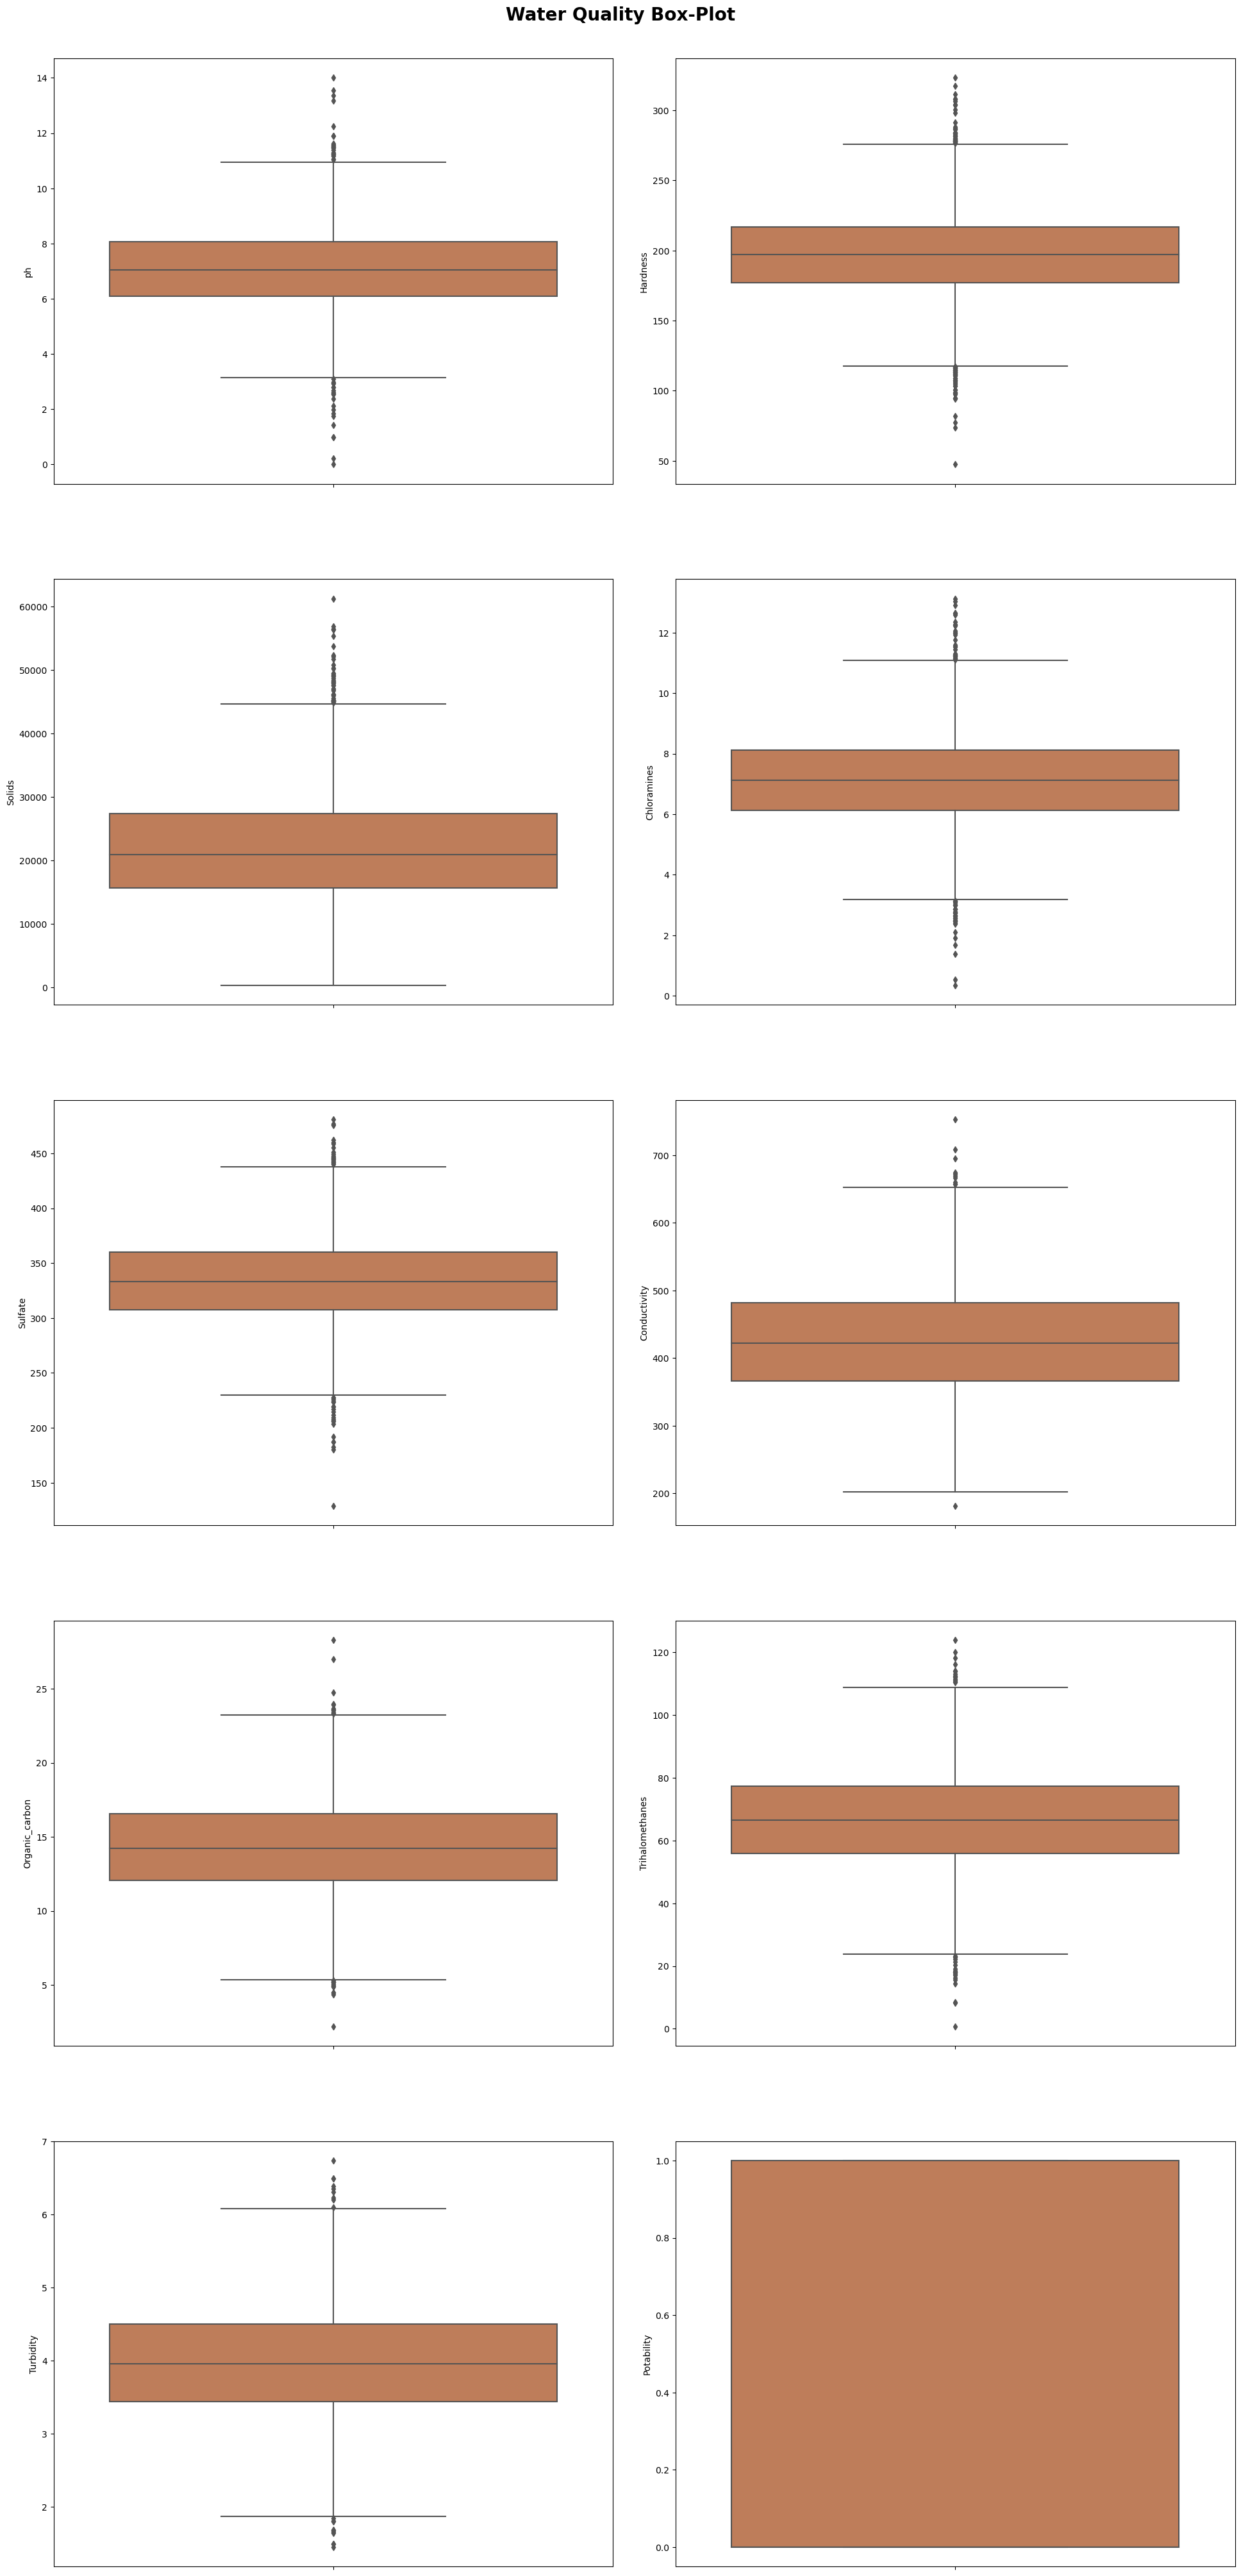

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(20,40))
index = 0
ax = ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index], color="#cf7849")
    index += 1
plt.tight_layout(pad=3.0, w_pad=3.0, h_pad=10.0)

plt.suptitle('Water Quality Box-Plot',y=1.01, size = 20, color = 'black', weight='bold')
     

#### Missing Values

In [24]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0.5, 1.0, 'Missing Data in Percentages')

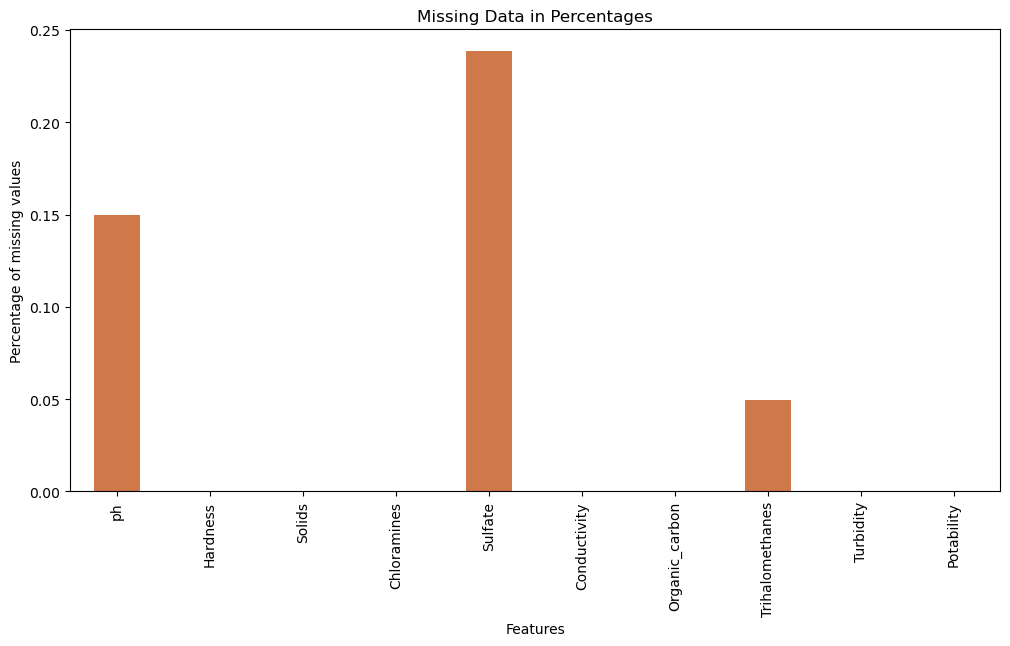

In [25]:
df.isnull().mean().plot.bar(figsize=(12,6), color="#cf7849") 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages')

In [26]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [27]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [28]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

In [56]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [57]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

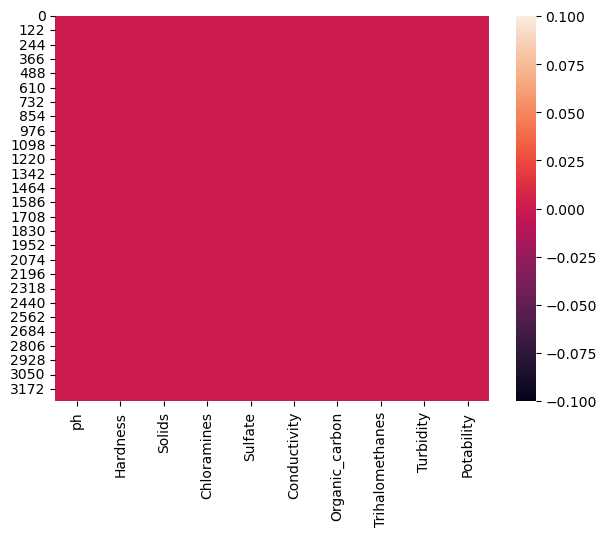

In [58]:
sns.heatmap(df.isnull())

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [80]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [82]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_train.shape, "\ny_test:", y_test.shape)

X_train: (2194, 9) 
y_train: (2194,)
X_test: (2194, 9) 
y_test: (1082,)


In [166]:
log=LogisticRegression()
log.fit(X_train,y_train)

print(f"Training Score : {log.score(X_train,y_train)}")
print(f"Testing Score : {log.score(X_test,y_test)}")

Training Score : 0.6011850501367365
Testing Score : 0.6284658040665434


In [167]:
y_pred =log.predict(X_test)

In [168]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.6284658040665434


In [169]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [170]:
print("", metrics.classification_report(y_test,y_pred))

               precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



In [171]:
cnfTrain1=print("", metrics.confusion_matrix(y_test,y_pred))
cnfTrain1

 [[680   0]
 [402   0]]


<Axes: >

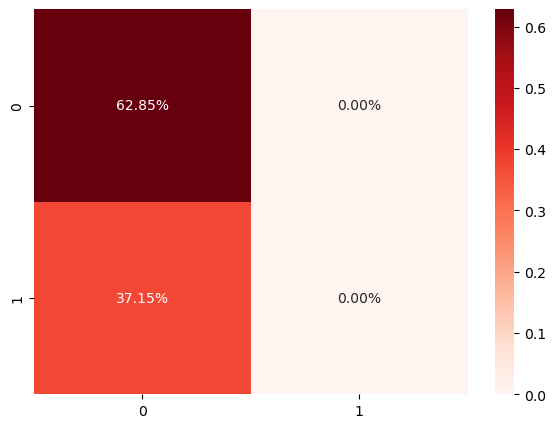

In [172]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

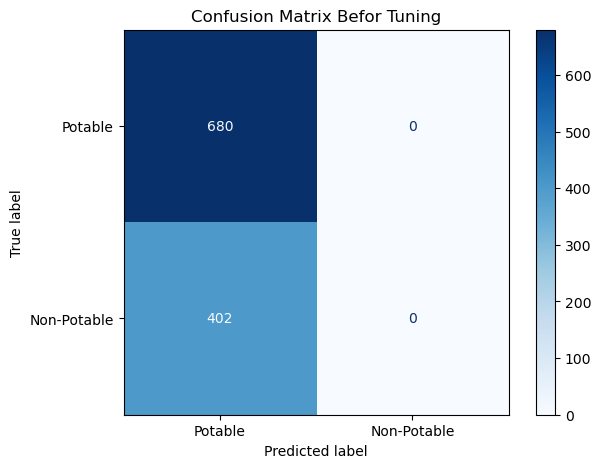

In [173]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Potable', 'Non-Potable'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Befor Tuning')
plt.show()

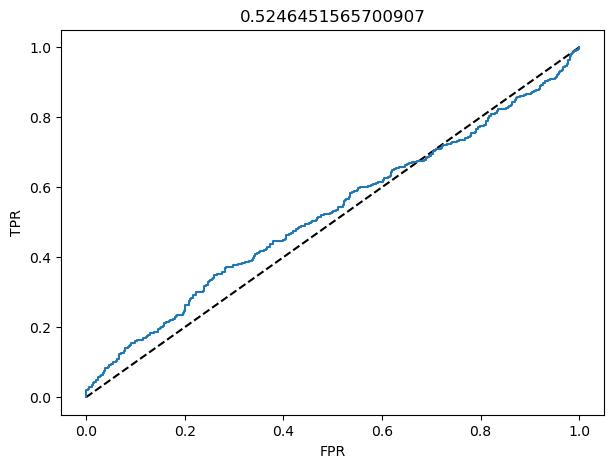

In [99]:
probab=log.predict_proba(X_test)[:,1]

fpr, tpr,_= metrics.roc_curve(y_test, probab)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab))
plt.show()

In [100]:
from sklearn.metrics import precision_recall_curve
probab1=log.predict_proba(X_test)[: ,1]

In [101]:
precision,recall,thresholds= precision_recall_curve(y_test,probab1)

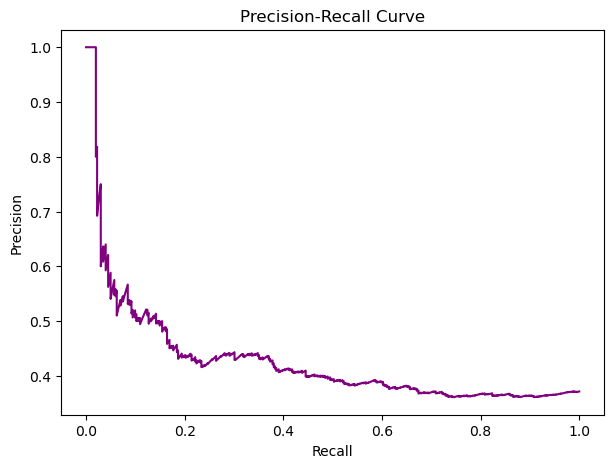

In [95]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [128]:
from sklearn.model_selection import GridSearchCV 

In [142]:
param_grid = {  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'] 
}

In [143]:
grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [144]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [145]:
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.6284658040665434


In [146]:
acc= metrics.accuracy_score(y_test,y_pred)

In [147]:
print('Accuracy :' , acc)

Accuracy : 0.6284658040665434


In [148]:
roc_au=metrics.roc_auc_score(y_test,y_pred)
print('ROC AUC :', roc_au)

ROC AUC : 0.5


In [150]:
print("", metrics.classification_report(y_test,y_pred))

               precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



In [112]:
print('Best :',best_param)

Best : {'penalty': 'l1', 'solver': 'saga'}


After hypertuning

In [135]:
LogReg2 = LogisticRegression( solver= 'saga',penalty='l1')

In [136]:
LogReg2.fit(X_train, y_train)
LogReg2_pred = LogReg2.predict(X_test)
LogReg2_acc = accuracy_score(y_test, LogReg2_pred)
LogReg2_mae = mean_absolute_error(y_test, LogReg2_pred)
LogReg2_mse = mean_squared_error(y_test, LogReg2_pred)
LogReg2_rmse = np.sqrt(mean_squared_error(y_test, LogReg2_pred))


In [137]:
from sklearn.metrics import classification_report

In [138]:
print("The accuracy for Logistic Regression is", LogReg2_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg2_pred))

The accuracy for Logistic Regression is 0.6284658040665434
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

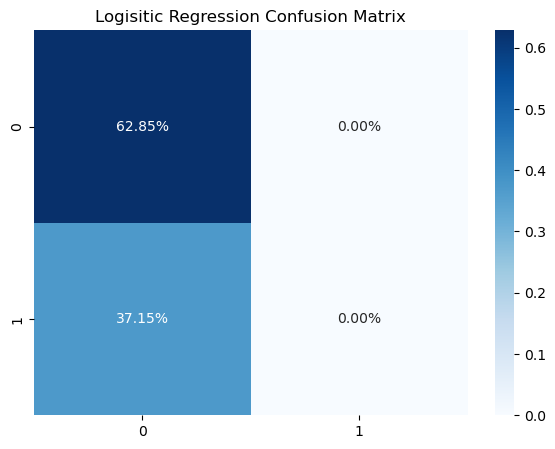

In [151]:
LogReg2_cm = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg2_cm/np.sum(LogReg2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Logisitic Regression Confusion Matrix")

#### Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier
log1=DecisionTreeClassifier(random_state=42)

In [175]:
log1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [176]:
y_pred =log1.predict(X_test)

In [177]:
print(f"Training Score : {log1.score(X_train,y_train)}")
print(f"Testing Score : {log1.score(X_test,y_test)}")
    

Training Score : 1.0
Testing Score : 0.5785582255083179


In [178]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.5785582255083179


In [179]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("", metrics.classification_report(y_test,y_pred))

               precision    recall  f1-score   support

           0       0.67      0.64      0.66       680
           1       0.44      0.47      0.45       402

    accuracy                           0.58      1082
   macro avg       0.55      0.56      0.56      1082
weighted avg       0.59      0.58      0.58      1082



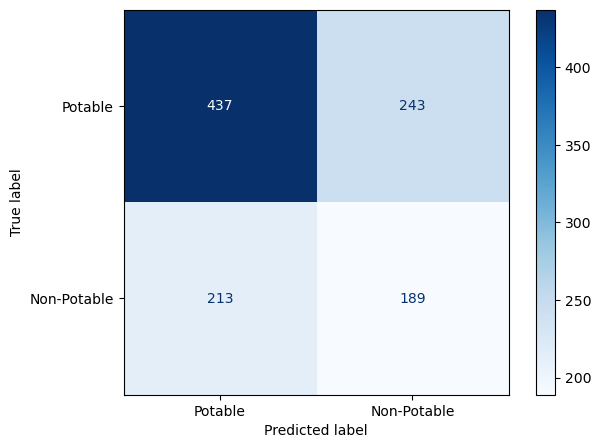

In [180]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Potable', 'Non-Potable'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

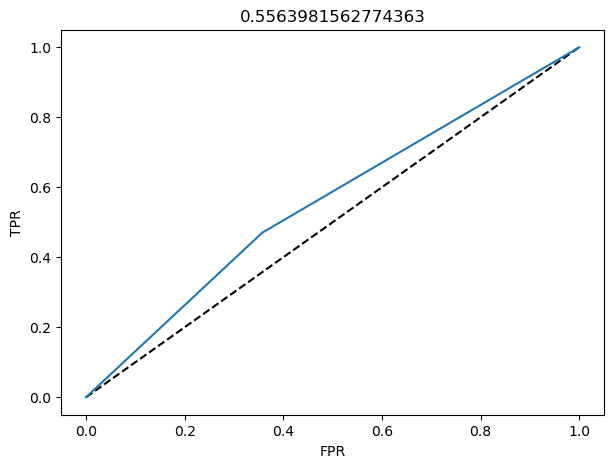

In [181]:
probab1=log1.predict_proba(X_test)[:,1]

fpr, tpr,_= metrics.roc_curve(y_test, probab1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab1))
plt.show()

#### SVM

In [192]:
from sklearn.svm import SVC

In [193]:
svcm = SVC()

In [194]:
svcm.fit(X_train, y_train)

SVC()

In [195]:
y_pred_svm =svcm.predict(X_test)

In [196]:
print(f"Training Score : {svcm.score(X_train,y_train)}")
print(f"Testing Score : {svcm.score(X_test,y_test)}")

Training Score : 0.731996353691887
Testing Score : 0.6885397412199631


In [198]:
print("Accuracy:", accuracy_score(y_test,y_pred_svm))


Accuracy: 0.6885397412199631


In [205]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("", metrics.classification_report(y_test,y_pred_svm))

               precision    recall  f1-score   support

           0       0.69      0.92      0.79       680
           1       0.68      0.30      0.42       402

    accuracy                           0.69      1082
   macro avg       0.69      0.61      0.60      1082
weighted avg       0.69      0.69      0.65      1082



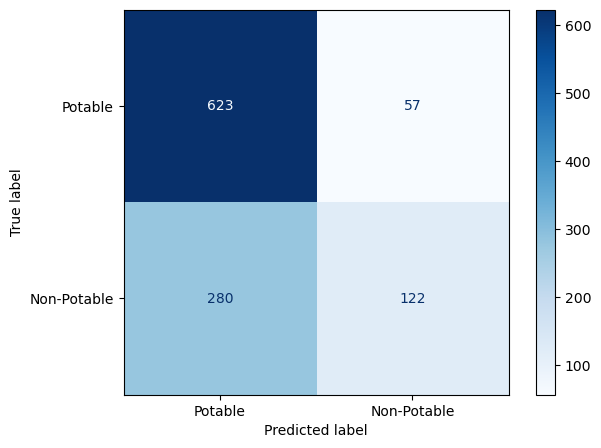

In [199]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Potable', 'Non-Potable'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

#### Naive bayes

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
gauss=GaussianNB()

In [220]:
gauss.fit(X_train, y_train)

GaussianNB()

In [222]:
print(f"Training Score : {gauss.score(X_train,y_train)}")
print(f"Testing Score : {gauss.score(X_test,y_test)}")

Training Score : 0.6257976298997265
Testing Score : 0.6367837338262476


In [223]:
y_pred_gauss = gauss.predict(X_test)

In [224]:
print("Accuracy:", accuracy_score(y_pred_gauss,y_test))

Accuracy: 0.6367837338262476


In [225]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("", metrics.classification_report(y_test,y_pred_gauss))

               precision    recall  f1-score   support

           0       0.66      0.88      0.75       680
           1       0.53      0.22      0.31       402

    accuracy                           0.64      1082
   macro avg       0.59      0.55      0.53      1082
weighted avg       0.61      0.64      0.59      1082



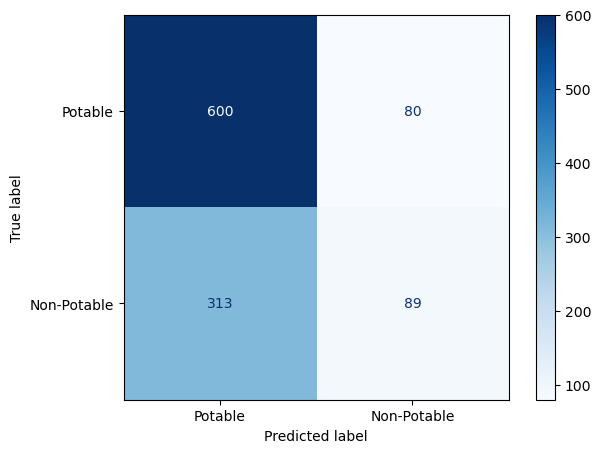

In [226]:
conf_matrix = confusion_matrix(y_test, y_pred_gauss)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Potable', 'Non-Potable'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

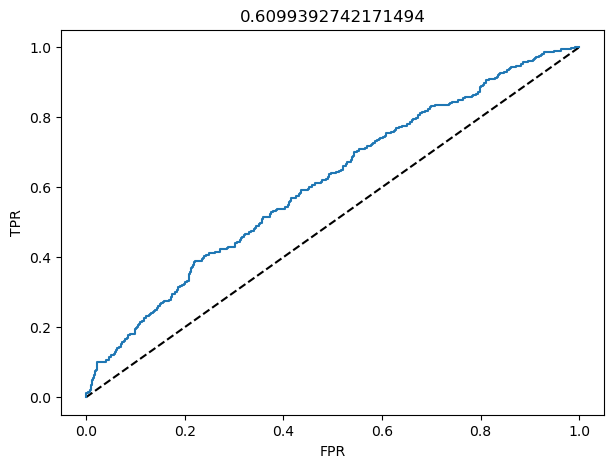

In [227]:
probab2=gauss.predict_proba(X_test)[:,1]

fpr, tpr,_= metrics.roc_curve(y_test, probab2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab2))
plt.show()

####  KNeighbours

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
KNN=KNeighborsClassifier()

In [230]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [232]:
print(f"Training Score : {KNN.score(X_train,y_train)}")
print(f"Testing Score : {KNN.score(X_test,y_test)}")

Training Score : 0.7570647219690064
Testing Score : 0.6349353049907579


In [233]:
y_pred_knn = KNN.predict(X_test)

In [234]:
print("Accuracy:", accuracy_score(y_pred_knn,y_test))

Accuracy: 0.6349353049907579


In [237]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("", metrics.classification_report(y_test,y_pred_knn))

               precision    recall  f1-score   support

           0       0.69      0.77      0.73       680
           1       0.51      0.40      0.45       402

    accuracy                           0.63      1082
   macro avg       0.60      0.59      0.59      1082
weighted avg       0.62      0.63      0.62      1082



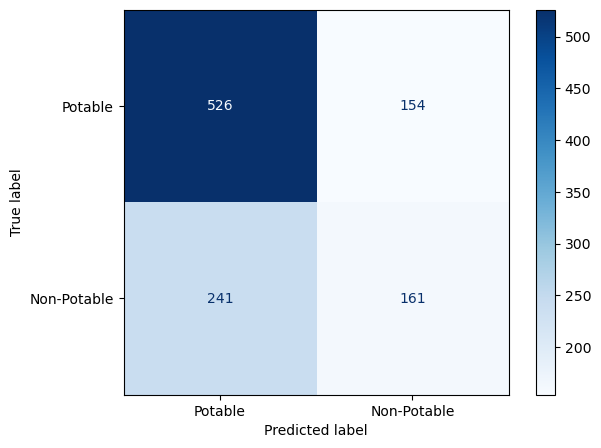

In [238]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Potable', 'Non-Potable'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

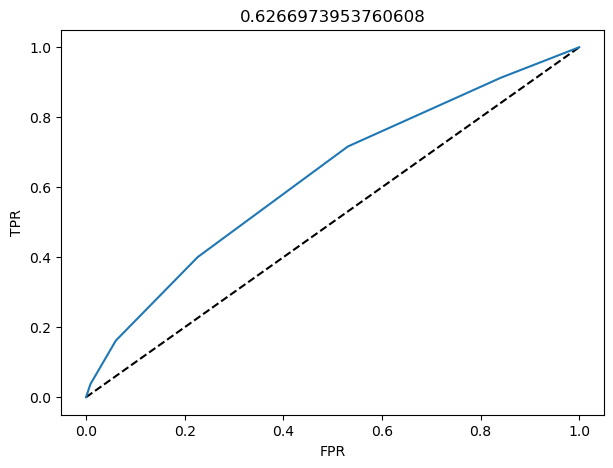

In [239]:
probab3=KNN.predict_proba(X_test)[:,1]

fpr, tpr,_= metrics.roc_curve(y_test, probab3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_test, probab3))
plt.show()